DAPT 622 - Homework 3 
Group 4 - Tammie Beckett, Laurynn Coleman, Tom Cerreto, Romontae Thornhill & Justin Elwell

In [1]:
# data processing
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

1. Read the dataset as a pandas dataframe and create two random partitions: train and test.

In [2]:
df_heart = pd.read_csv('heart.csv')
print(df_heart)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [3]:
#Split the dataset
train, test = train_test_split(df_heart, random_state=121)

train.shape, test.shape

((688, 12), (230, 12))

2. Identify all non-numeric columns and create binary flags for each value for each of these categorical features.

In [4]:
non_numeric_columns = df_heart.select_dtypes(exclude=[np.number, 'bool']).columns

In [25]:
print(non_numeric_columns)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [24]:
print(heart_encoded.dtypes)

Age                  int32
RestingBP            int32
Cholesterol          int32
FastingBS            int32
MaxHR                int32
Oldpeak              int32
HeartDisease         int32
Sex_F                int32
Sex_M                int32
ChestPainType_ASY    int32
ChestPainType_ATA    int32
ChestPainType_NAP    int32
ChestPainType_TA     int32
RestingECG_LVH       int32
RestingECG_Normal    int32
RestingECG_ST        int32
ExerciseAngina_N     int32
ExerciseAngina_Y     int32
ST_Slope_Down        int32
ST_Slope_Flat        int32
ST_Slope_Up          int32
dtype: object


In [26]:
heart_encoded = pd.get_dummies(df_heart, columns=non_numeric_columns)

#heart_encoded = heart_encoded.astype(int)

print(heart_encoded)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108        1             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132        1             1   
914   68        144          193          1    141        3             1   
915   57        130          131          0    115        1             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0 

3. Standardize the data by calculating z-scores for each feature.

In [27]:
numeric_columns = heart_encoded.select_dtypes(include=[np.number]).columns.drop('HeartDisease')
df_heart_z = heart_encoded.copy()
df_heart_z[numeric_columns] = (heart_encoded[numeric_columns] - heart_encoded[numeric_columns].mean()) / heart_encoded[numeric_columns].std(ddof=0)
print(df_heart_z)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.727592   
1   -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.282891   
2   -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.727592   
3   -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.282891   
4    0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.727592   
..        ...        ...          ...        ...       ...       ...   
913 -0.902775  -1.210356     0.596393  -0.551341 -0.188999  0.282891   
914  1.536902   0.627078    -0.053049   1.813758  0.164684  2.303858   
915  0.370100  -0.129513    -0.620168  -0.551341 -0.857069  0.282891   
916  0.370100  -0.129513     0.340275  -0.551341  1.461525 -0.727592   
917 -1.645286   0.302825    -0.217696  -0.551341  1.422226 -0.727592   

     HeartDisease     Sex_F     Sex_M  ChestPainType_ASY  ...  \
0               0 -0.515952  0.515952          -1.084138  ...   
1    

In [7]:
#List of boolean columns to convert to 0/1
bool_cols = ['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

#Convert only the specified boolean columns to 0/1
df_heart_z[bool_cols] = df_heart_z[bool_cols].astype(int)
print(df_heart_z)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432   
1   -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664   
2   -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432   
3   -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711   
4    0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432   
..        ...        ...          ...        ...       ...       ...   
913 -0.902775  -1.210356     0.596393  -0.551341 -0.188999  0.293283   
914  1.536902   0.627078    -0.053049   1.813758  0.164684  2.357094   
915  0.370100  -0.129513    -0.620168  -0.551341 -0.857069  0.293283   
916  0.370100  -0.129513     0.340275  -0.551341  1.461525 -0.832432   
917 -1.645286   0.302825    -0.217696  -0.551341  1.422226 -0.832432   

     HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0               0      0      1                  0  ...  

4. Using the train set, build four different models, using techniques listed below. Use HeartDisease as the target (dependent) variable and include all numeric features that are present in the original dataset as well as the binary flags created in task #2.
a. Logistic Regression,
b. Decision (Classification) Tree,
c. Random Forest, and
d. Gradient Boosting.
For the three tree-based models mentioned above, optimize the appropriate hyper-parameters (either
using grid-search or random-search) to find the best model for each technique.

In [8]:
#original numeric features with binary flags
heart_encoded = heart_encoded.astype(int)
print(heart_encoded)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108        1             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132        1             1   
914   68        144          193          1    141        3             1   
915   57        130          131          0    115        1             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0 

In [28]:
#Redo the split
train, test = train_test_split(heart_encoded, random_state=121)

train.shape, test.shape

#Define HeartDisease as target for the training data
X_train = train.drop('HeartDisease', axis=1)
y_train = train['HeartDisease']

#Define features and target for the testing data
X_test = test.drop('HeartDisease', axis=1)
y_test = test['HeartDisease']

print(X_train)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
759   54        192          283          0    195        0      0      1   
137   39        120          241          0    146        2      0      1   
284   42        140          358          0    170        0      0      1   
905   67        152          212          0    150        0      0      1   
477   61        110            0          1    108        2      0      1   
..   ...        ...          ...        ...    ...      ...    ...    ...   
500   65        136          248          0    140        4      0      1   
607   53        144          300          1    128        1      0      1   
264   47        140          193          0    145        1      0      1   
469   56        124          224          1    161        2      0      1   
322   38        105            0          1    166        2      1      0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
759        

In [10]:
#Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
#Decision Tree
dtree = DecisionTreeClassifier(random_state=121)

param_grid_dtree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search_dtree = GridSearchCV(dtree, param_grid_dtree, cv=3, scoring='roc_auc')
grid_search_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=121),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [12]:
best_dtree = grid_search_dtree.best_estimator_
print(best_dtree)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=121)


In [13]:
#Random Forest
rf = RandomForestClassifier(random_state=121)

param_grid_rf = {
    'n_estimators': [200, 500],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=121),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [200, 500]},
             scoring='roc_auc')

In [14]:
best_rf = grid_search_rf.best_estimator_
print(best_rf)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=2,
                       n_estimators=500, random_state=121)


In [15]:
#Gradient Boost
gboost = GradientBoostingClassifier(random_state=121)

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_search_gb = GridSearchCV(gboost, param_grid_gb, cv=3, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=121),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [16]:
best_gb = grid_search_gb.best_estimator_
print(best_gb)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,
                           random_state=121)


5. Compare the performance of these four models on the test partition, using the following metrics:
a. AUC (Area Under the ROC Curve),
b. Confusion matrix, and
c. Log loss.
Plot the ROC curves for all four models in one plot. Which models has the best performance on the
test set?`

In [17]:
# Logistic Regression probabilities and predictions
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_preds = logreg.predict(X_test)

# Decision Tree probabilities and predictions
dtree_probs = best_dtree.predict_proba(X_test)[:, 1]
dtree_preds = best_dtree.predict(X_test)

# Random Forest probabilities and predictions
rf_probs = best_rf.predict_proba(X_test)[:, 1]
rf_preds = best_rf.predict(X_test)

# Gradient Boosting probabilities and predictions
gb_probs = best_gb.predict_proba(X_test)[:, 1]
gb_preds = best_gb.predict(X_test)

In [18]:
#a. AUC
logreg_auc = roc_auc_score(y_test, logreg_probs)
dtree_auc = roc_auc_score(y_test, dtree_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

print("Logistic Regression AUC: {:.4f}".format(logreg_auc))
print("Decision Tree AUC: {:.4f}".format(dtree_auc))
print("Random Forest AUC: {:.4f}".format(rf_auc))
print("Gradient Boosting AUC: {:.4f}".format(gb_auc))

Logistic Regression AUC: 0.9430
Decision Tree AUC: 0.9036
Random Forest AUC: 0.9454
Gradient Boosting AUC: 0.9413


In [19]:
#b. Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_preds)
dtree_cm = confusion_matrix(y_test, dtree_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

print("Logistic Regression Confusion Matrix:\n", logreg_cm, "\n")
print("Decision Tree Confusion Matrix:\n", dtree_cm, "\n")
print("Random Forest Confusion Matrix:\n", rf_cm, "\n")
print("Gradient Boosting Confusion Matrix:\n", gb_cm, "\n")

Logistic Regression Confusion Matrix:
 [[ 90  13]
 [ 14 113]] 

Decision Tree Confusion Matrix:
 [[ 92  11]
 [ 19 108]] 

Random Forest Confusion Matrix:
 [[ 87  16]
 [  9 118]] 

Gradient Boosting Confusion Matrix:
 [[ 88  15]
 [ 11 116]] 



In [20]:
#c. Log Loss
logreg_ll = log_loss(y_test, logreg_probs)
dtree_ll = log_loss(y_test, dtree_probs)
rf_ll = log_loss(y_test, rf_probs)
gb_ll = log_loss(y_test, gb_probs)

print("Logistic Regression Log Loss: {:.4f}".format(logreg_ll))
print("Decision Tree Log Loss: {:.4f}".format(dtree_ll))
print("Random Forest Log Loss: {:.4f}".format(rf_ll))
print("Gradient Boosting Log Loss: {:.4f}".format(gb_ll))

Logistic Regression Log Loss: 0.3060
Decision Tree Log Loss: 2.2121
Random Forest Log Loss: 0.3161
Gradient Boosting Log Loss: 0.3209


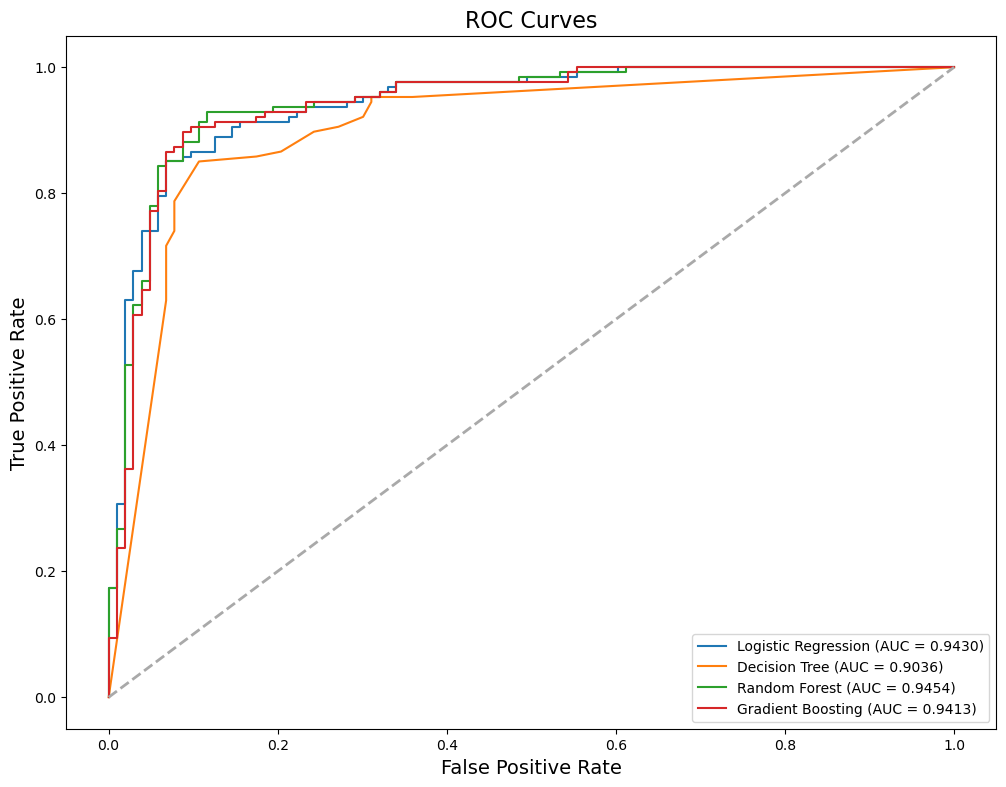

In [21]:
#ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, dtree_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)

plt.figure(figsize=(12, 9))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.4f})'.format(logreg_auc))
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree (AUC = {:.4f})'.format(dtree_auc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.4f})'.format(rf_auc))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.4f})'.format(gb_auc))
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves', fontsize=16)
plt.legend(loc='best')
plt.show()

6. Get the predicted probabilities from all four models for every record in the test set. Plot those probabilities on one chart to show the distribution of those probabilities for all four models. Also, calculate the correlation matrix among all four predicted probabilities. Submit a Jupyter Notebook that performs the above tasks and contains the answers to these questions above.

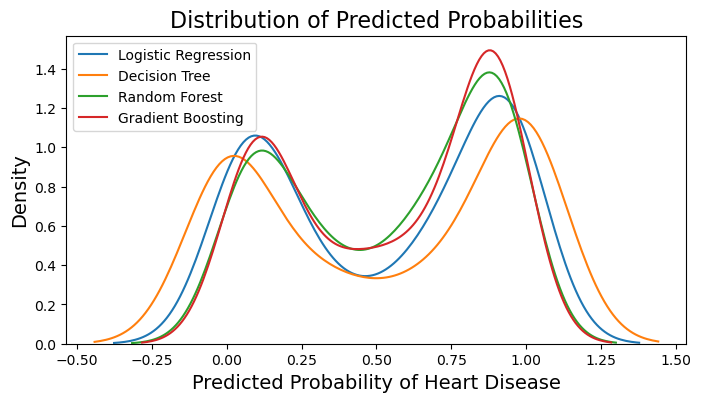

In [22]:
#Create the dataframe for probabilities
probabilities = pd.DataFrame({
    'Logistic Regression': logreg_probs,
    'Decision Tree': dtree_probs,
    'Random Forest': rf_probs,
    'Gradient Boosting': gb_probs
})

#Plotting the distributions
plt.figure(figsize=(8, 4))
for column in probabilities.columns:
    sns.kdeplot(probabilities[column], label=column)

plt.title('Distribution of Predicted Probabilities', fontsize=16)
plt.xlabel('Predicted Probability of Heart Disease', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

In [23]:
#Calculating the correlation matrix
correlation_matrix = probabilities.corr()

print(correlation_matrix)

                     Logistic Regression  Decision Tree  Random Forest  \
Logistic Regression             1.000000       0.873951       0.970483   
Decision Tree                   0.873951       1.000000       0.909775   
Random Forest                   0.970483       0.909775       1.000000   
Gradient Boosting               0.961440       0.911602       0.988159   

                     Gradient Boosting  
Logistic Regression           0.961440  
Decision Tree                 0.911602  
Random Forest                 0.988159  
Gradient Boosting             1.000000  
